In [1]:
# GMM Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture as GMM
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap

In [33]:
dataset = pd.read_csv('listings.csv')

# Replace the empty string with np.nan
dataset.replace(r'', np.nan)

# Ignore listings that contain missing values
nan_removed = dataset[~pd.isnull(dataset).any(axis=1)]

# Extract columns - latitude, longitude, price
data = nan_removed[['latitude','longitude','price']]

# Scale the data
data_scaled = preprocessing.scale(data)

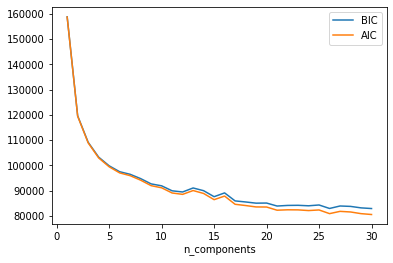

In [29]:
# Determine the optimal value of K
n_components = np.arange(1, 31)
models = [GMM(n).fit(data_scaled) for n in n_components]

plt.plot(n_components, [m.bic(data_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [34]:
# Runs GMM clustering algorithm
gmm = GMM(n_components=13).fit(data_scaled) # run the GMM clustering algorithm
assignments = gmm.predict(data_scaled)
    
clustering = defaultdict(list)
for assignment, point in zip(assignments, data_scaled):
    clustering[assignment].append(point)

StopIteration: 

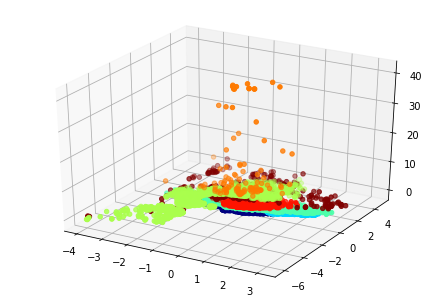

In [35]:
# 3D Visualization of K-means Clustering (an example for k=3)

jet=plt.get_cmap('jet')
colors=iter(jet(np.linspace(0,1,10)))

fig=plt.figure()
ax=Axes3D(fig)
for idx in clustering:
    x = np.array(clustering[idx])[:,0]
    y = np.array(clustering[idx])[:,1]
    z = np.array(clustering[idx])[:,2]
    ax.scatter(x, y, z, color=next(colors))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()